In [13]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import xarray as xr
from scipy import interpolate, signal
import netCDF4 as nc
from CoreBx_funcs import *
import pickle

%matplotlib inline

vegmap= cm.get_cmap('YlGn')
vegmap.set_bad(color='darkgray')

# This is the colormap made in SurferClr2Cmap.ipynb from NorthCore_ElevationShader_v2.clr
fp = open('cmap_ncb.pkl', 'rb')
cmap_ncb = pickle.load(fp)
fp.close()

tcmap=cmap_ncb
tcmap.set_bad(color='darkgray')

In [9]:
fdir = "C:/crs/proj/2021_hi_res_grid/"
fnames = ("2019-08-30_1m_DEM_4d_hr.tif",
          "2019-09-12-13_1m_DEM_4d_hr.tif",
          "2019-10-11_1m_DEM_4d_hr.tif",
          "2019_NCMP_gnd_50_1m_hr.tif",
          "2019_NCMP_1st95_1m_hr.tif",
          "2019_NCMP_Veg_1st95_minus_gnd_50_1m_hr.tif",
)
mnames = ("Sep SfM",
          "Oct SfM",
          "Nov SfM",
          "Nov Lidar Gnd50",
          "Nov Lidar First95",
          "Nov Lidar Diff")

fnnc = 'C:/crs/proj/2019_DorianOBX/NCEI_gridded_bathy/morehead_city_13_navd88_2011.nc'
# ds = nc.Dataset(fnnc)
# print(ds)

# dimension array for elevations
z = np.nan*np.ones((6, 1685, 1627))
print(np.shape(z))

(6, 1685, 1627)


In [ ]:
dslist=[]
for i, fn in enumerate(fnames):
    iswarned = False
    fp = fdir+fn
    print(i, fp)

    # open the tif with XArray as a DataArray
    da = xr.open_rasterio(fp)

    print( np.shape(np.flipud(da['y'].values)), np.shape(da['x'].values), np.shape( np.flipud(da.values)) )
    x = da['x'].values
    y = np.flipud(da['y'].values)

    # Not sure how da.values got a singleton dimension, but squeeze gets rid of it.
    # However, make sure to squeeze before flipping
    z[i,:,:] = np.flipud(np.squeeze(da.values))
  

In [19]:
  
ibadz = np.argwhere(z<=-32767.)
z[ibadz] = np.nan

IndexError: index 6 is out of bounds for axis 0 with size 6

In [3]:
# test UTM2LatLon
# Coordinates of test point CHL2 (benchmark near the Cape Hatteras light)
# NAD 83(2011) POSITION- 35 15 06.46121(N) 075 31 34.42905(W)   ADJUSTED 
# UTM  18      - 3,901,093.616   452,127.951   MT  0.99962824   -0 18 13.4

latbm = 35.+15./60.+6.46121/3600.
lonbm = -(75.+31/60.+34.42905/3600.)

lont, latt = UTM2LatLon(452127.9512561703, 3901093.6160874437 )
print(latt, lont)
print(latbm,lonbm)

35.251794780555564 -75.52623029166666
35.25179478055556 -75.52623029166666


C:\Users\csherwood\AppData\Local\Continuum\miniconda3\envs\CRS\lib\site-packages\pyproj\crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))
C:\Users\csherwood\AppData\Local\Continuum\miniconda3\envs\CRS\lib\site-packages\pyproj\crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


In [6]:
easting, northing = np.meshgrid(x,y)
xisl, yisl = UTM2Island(easting,northing)
lon, lat = UTM2LatLon(easting, northing)

C:\Users\csherwood\AppData\Local\Continuum\miniconda3\envs\CRS\lib\site-packages\pyproj\crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))
C:\Users\csherwood\AppData\Local\Continuum\miniconda3\envs\CRS\lib\site-packages\pyproj\crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


x: (1627,) 
 [394084.42627824 394085.42627824 394086.42627824 ... 395708.42627824
 395709.42627824 395710.42627824]
y: (1685,) 
 [3871151.97458986 3871152.97458986 3871153.97458986 ... 3872833.97458986
 3872834.97458986 3872835.97458986]


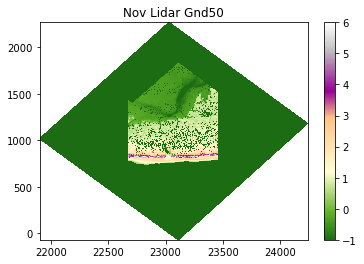

In [17]:
print('x:',np.shape(x),'\n',x)
print('y:',np.shape(y),'\n',y)
mapnum=3
plt.pcolormesh(xisl,yisl,z[mapnum,:,:],cmap=tcmap,vmin=-1,vmax=6)
plt.title(mnames[mapnum])
plt.colorbar()

In [18]:
print(z[3,:,:])

[[-32767. -32767. -32767. ... -32767. -32767. -32767.]
 [-32767. -32767. -32767. ... -32767. -32767. -32767.]
 [-32767. -32767. -32767. ... -32767. -32767. -32767.]
 ...
 [-32767. -32767. -32767. ... -32767. -32767. -32767.]
 [-32767. -32767. -32767. ... -32767. -32767. -32767.]
 [-32767. -32767. -32767. ... -32767. -32767. -32767.]]
